<a href="https://colab.research.google.com/github/Vinni1798/Mobile-price-range-prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem statement**

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

This will basically help companies to estimate price of mobiles to give tough competition to other mobile manufacturer. Also, it will be useful for consumers to verify that they are paying best price for a mobile

# **Understanding the columns of Data set**

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions


**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone


**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# **Importing libraries & loading Dataset**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#creating directory path
dir_path='/content/drive/MyDrive/data_mobile_price_range.csv'

In [ ]:
#reading csv file
mobile_df=pd.read_csv(dir_path)

# **Reading dataset**

In [ ]:
#let's see dataframe
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## copy of dataframe

In [ ]:
#creating copy of dataframe
mobile_df_copy=mobile_df.copy()

In [ ]:
#checking shape of dataframe
mobile_df_copy.shape

(2000, 21)

In [ ]:
#printing all columns/feature
mobile_df_copy.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Our dataset have around **2** thousand rows and **21** columns

##Statastical summary of data

In [ ]:
#statastical summary
mobile_df_copy.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### From the statical summary we can check mean,maximum,minimum values of each feature

## **Checking info of dataframe**

In [ ]:
#checking info
mobile_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#checking null values and sorting in descending order
mobile_df_copy.isnull().sum().sort_values(ascending=True)

battery_power    0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
px_height        0
wifi             0
pc               0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
blue             0
n_cores          0
price_range      0
dtype: int64

Ohh ,that's great | In our dataset there is no null / missing values

Till now we checked for null/missing value and also datatype of our dataframe columns,Now let's check for outlier.

For a particular feature outlier is basically either very less or either very extreme value compared to all other value to that feature.

Identification of potential outliers is important because ,An outlier may indicate bad data. For example, the data may have been puted incorrectly or an experiment may not have been run correctly.

In [ ]:
mobile_df_copy.price_range.unique()

array([1, 2, 3, 0])

In [ ]:
mobile_df_copy['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# **Exploratory data analysis and  Visualization**

## **Histogram of all numerical-cols of features**

In [ ]:
catcols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

contcols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 
            'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

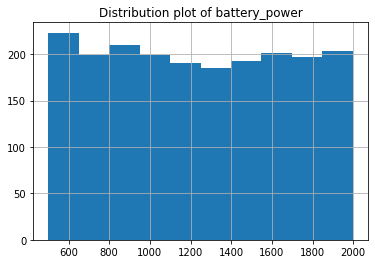

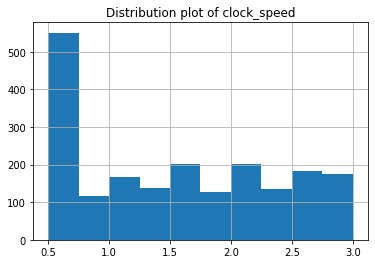

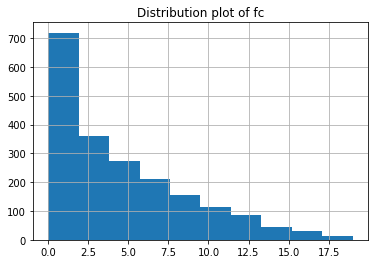

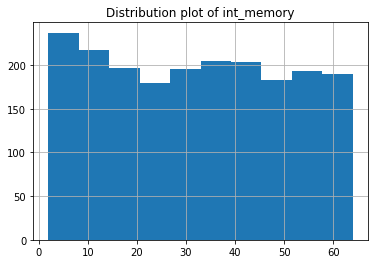

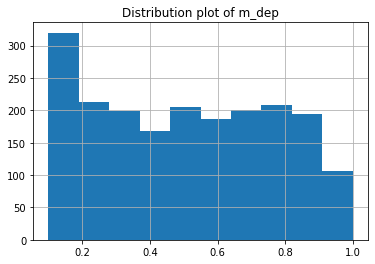

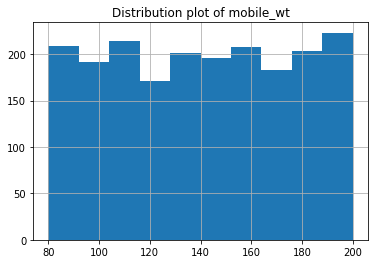

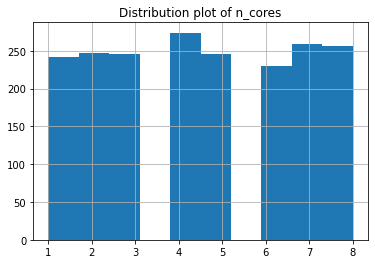

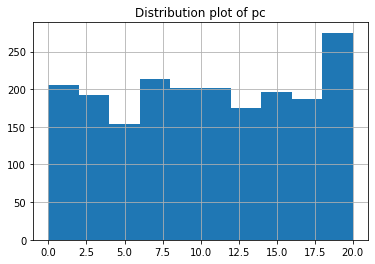

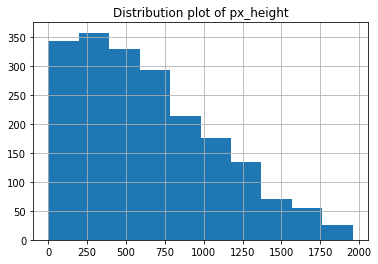

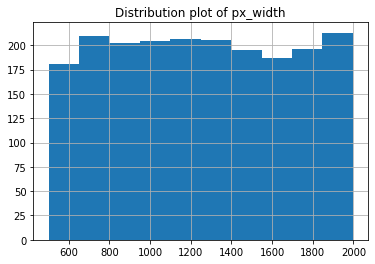

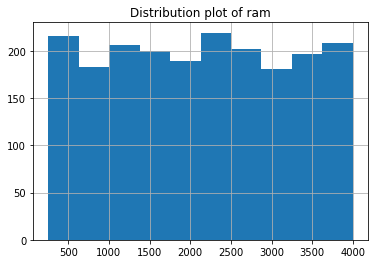

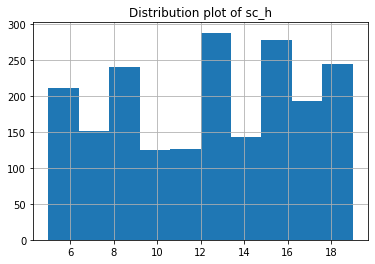

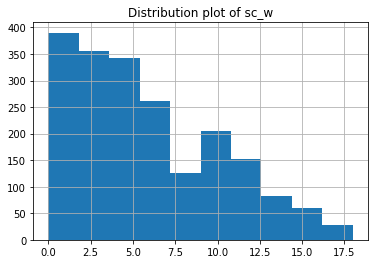

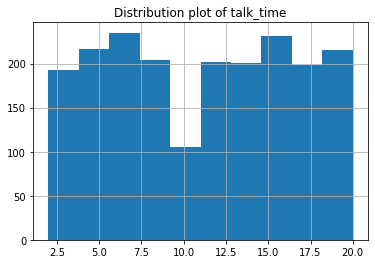

In [ ]:
for col in mobile_df_copy[contcols]:
    plt.title(f'Distribution plot of {col}')
    mobile_df_copy[col].hist()
    plt.show()

## **Countplot of all categorical columns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


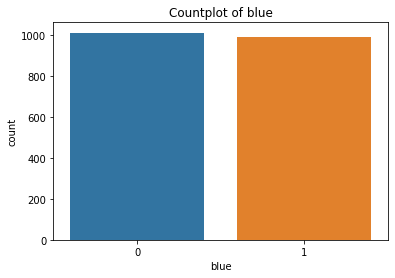

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


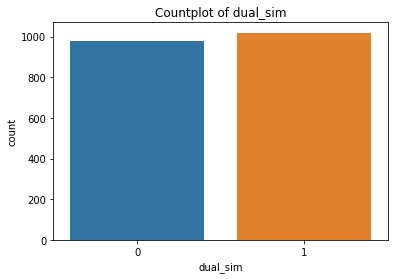

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


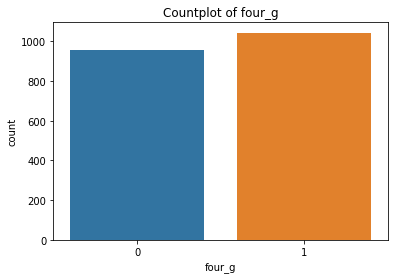

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


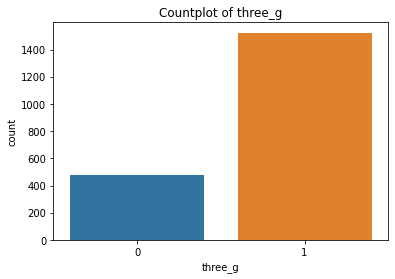

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


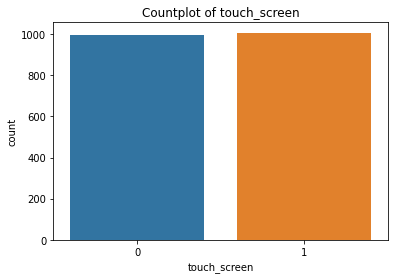

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


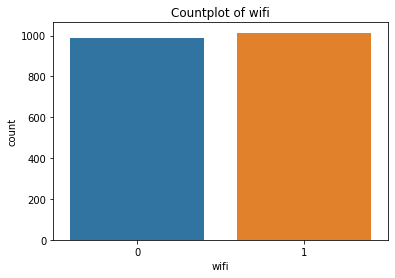

In [ ]:
for col in mobile_df_copy[catcols]:
    plt.title(f'Countplot of {col}')
    sns.countplot(mobile_df_copy[col])
    plt.show()

## **Now lets remove outliars from numeric data if any**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


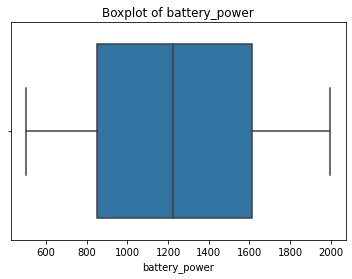

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


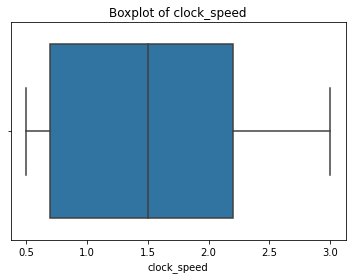

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


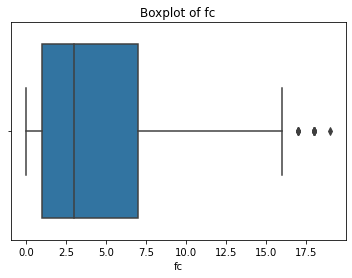

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


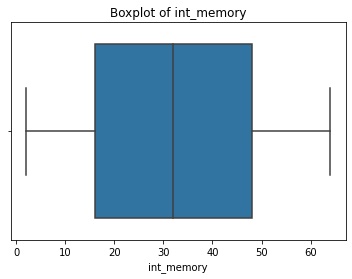

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


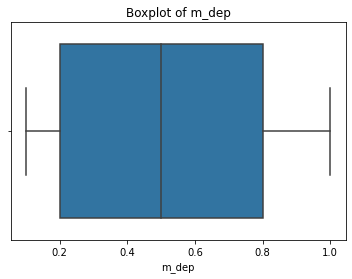

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


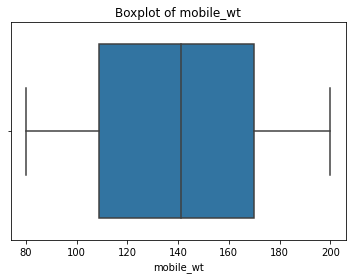

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


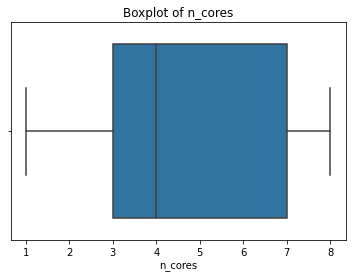

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


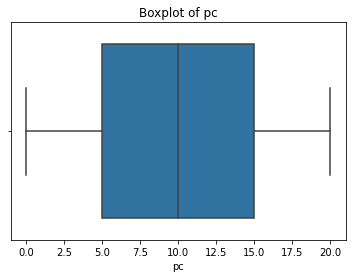

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


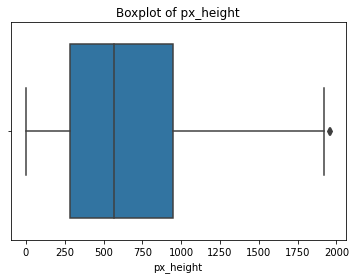

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


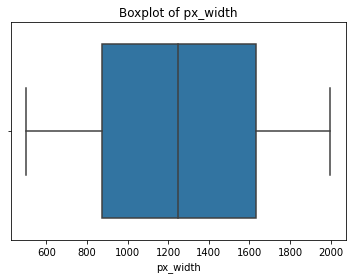

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


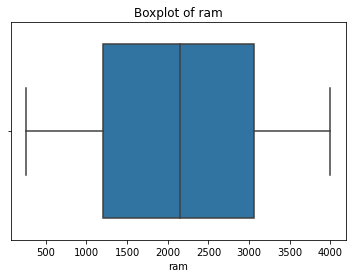

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


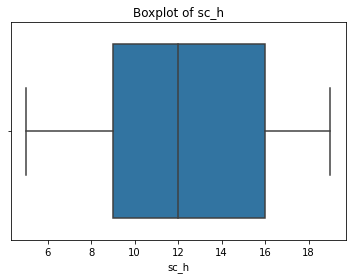

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


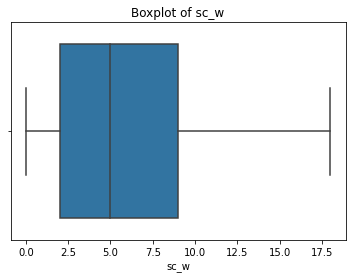

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


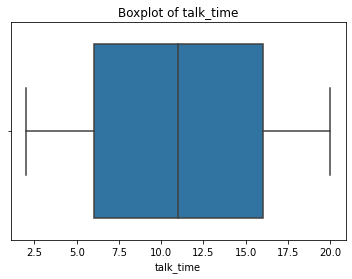

In [ ]:
for col in contcols:
    plt.title(f'Boxplot of {col}')
    sns.boxplot(mobile_df_copy[col])
    plt.show()

As we can see there are no outliers present we can proceed for the next steps.

## **Number of samples for each price range**

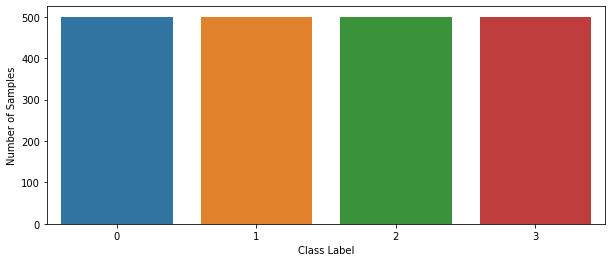

In [ ]:
# number of samples for each price range
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(x ='price_range', data=mobile_df_copy)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

**There is no imbalance in the target value which is great**

## **Correlation matrix of the data**

In [ ]:
# find correlation
corr_mat = mobile_df_copy.corr()

# each columns correlation with the price
corr_mat['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [ ]:
# convert all to positive and sort by value
abs(corr_mat).sort_values(by=['price_range'])['price_range']

m_dep            0.000853
n_cores          0.004399
clock_speed      0.006606
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
mobile_wt        0.030302
touch_screen     0.030411
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

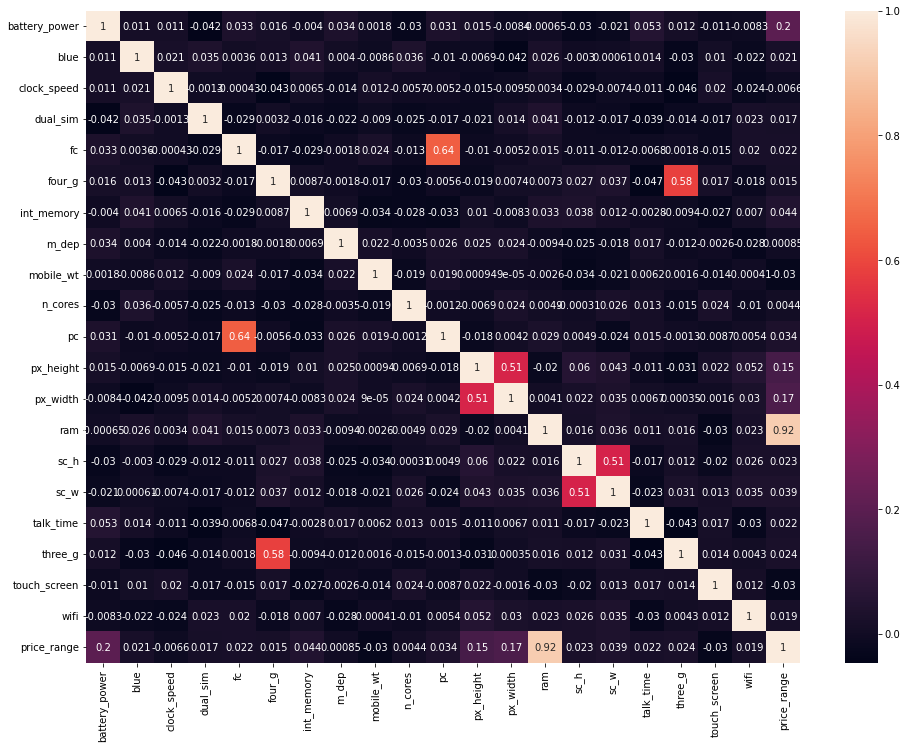

In [ ]:
#creating heatmap
plt.figure(figsize = (16,12))
sns.heatmap(mobile_df_copy.corr(),annot=True)

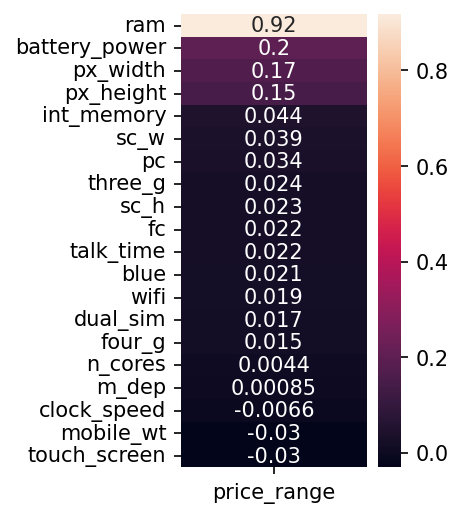

In [ ]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(mobile_df_copy.corr()[["price_range"]].sort_values
            (by="price_range", ascending=False)[1:],annot=True)

**we can make a few observations from above**





*   The ram is the most deciding factor in price range with the highest correlation.
*   The amount of pixels do matter after all.

*   Number of cores does not correlate with the price much (could be due to the cores being weak, for example most midrangers nowadays have 8 cores while the Apple A series SoCs have at most 6 cores and still perform miles better).









## **Next, we'll use plotly to visualize the 3 most highly correlated variables to price_range**

In [ ]:
import plotly.express as px
fig = px.scatter_3d(mobile_df_copy.head(2000), x='ram', y='battery_power', z='px_width', color='price_range')
fig.show()

## **RAM vs Price Range**

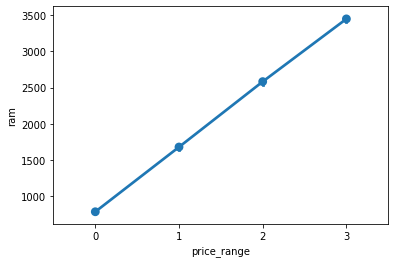

In [ ]:
sns.pointplot(y="ram", x="price_range", data=mobile_df_copy)

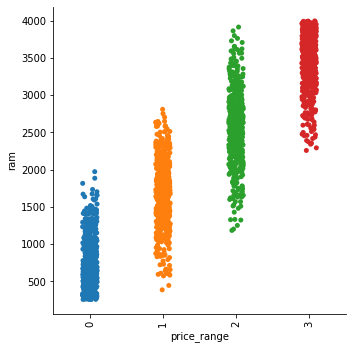

In [ ]:
sns.catplot(x="price_range",y="ram",data=mobile_df_copy)
plt.xticks(rotation=90);

## **Price range according to the number of processor cores and battery power**

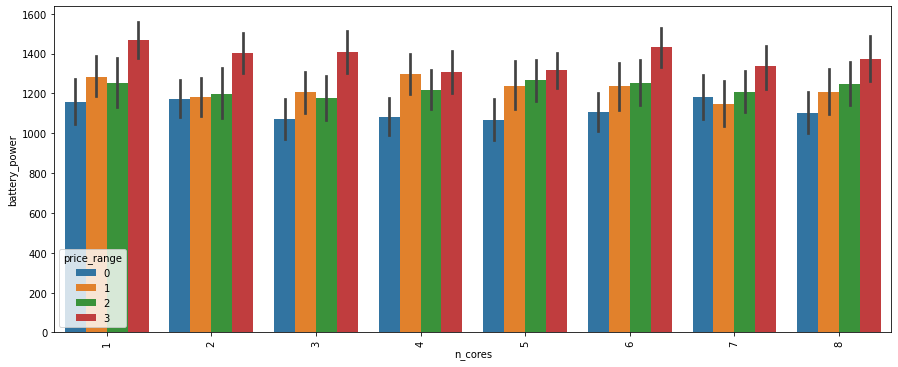

In [ ]:
plt.figure(figsize=(15,6));
sns.barplot( x= "n_cores", y = "battery_power" ,hue="price_range", data=mobile_df_copy)
plt.xticks(rotation=90);

## **Internal Memory in Gigabytes vs Price Range**

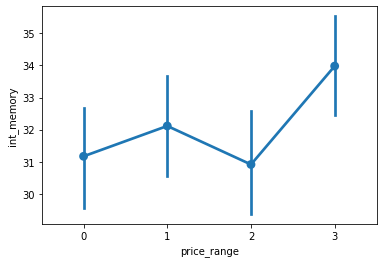

In [ ]:
sns.pointplot(y="int_memory", x="price_range", data=mobile_df_copy)


## **Distribution of Phones Supporting 4G**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



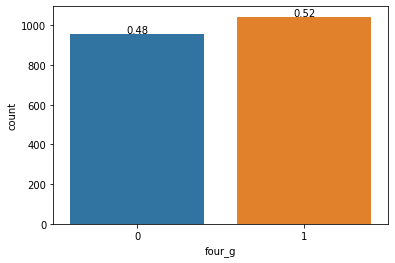

In [ ]:
total = float(len(mobile_df_copy))
ax = sns.countplot(mobile_df_copy["four_g"]);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center"); 

**52% of the phones support 4G from our data set**

## **Distribution of Phones Supporting 3G**

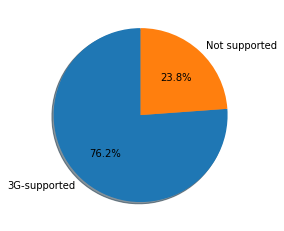

In [ ]:
labels = ["3G-supported",'Not supported']
values=mobile_df_copy['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

**76% of the phones support 3G from our data set**

## **Distribution of Phones Supporting Wifi**


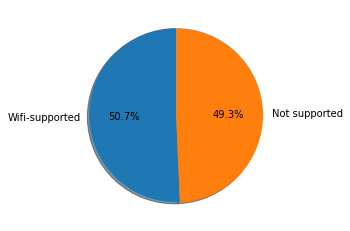

In [ ]:
labels = ["Wifi-supported",'Not supported']
values=mobile_df_copy['wifi'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

**50.7% of Mobiles support Wifi**

## **DUAL SIM- RAM AND PRICE RANGE**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

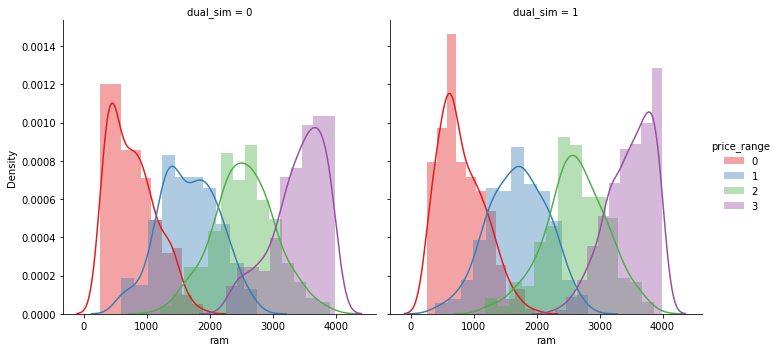

In [ ]:
g = sns.FacetGrid(mobile_df_copy, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

# **Let's start to build machine learning models.**

## **Logistic Regression model**

### **Splitting Data**


Above, we first gave all variables except the "price_range" variable to the X variable and gave the variable "price_range" to the y variable. Then we split the data into train and test data. X_train and y_train show the dependent and independent variables to be used to test the model, while X_test and y_test are used to develop the model. Test_size specifies how many of data (10%) will be used for testing. Random_state is used to see the same distinction every time we run the program.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [ ]:
#Since all the features are in different range, preprocessing scalar is applied
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = mobile_df_copy.drop('price_range',axis=1)
y = mobile_df_copy['price_range']

scaler.fit(X)
X_transformed = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3, random_state=42)

### **Implimentation of Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',solver = 'sag') # (sag = Stochastic Average Gradient)
lr.fit(X_train, y_train)

# Predict the test set
y_train_pred = lr.predict(X_train)

y_test_pred = lr.predict(X_test)



### **Evaluation of the preformance**

In [ ]:
# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:97.64285714285714
Test Set Accuracy:95.83333333333334

Confusion Matrix:
[[144   3   0   0]
 [  7 142   7   0]
 [  0   1 135   1]
 [  0   0   6 154]]


**Train Set Accuracy:97.64**

**Test Set Accuracy:95.83**

## **Decision tree model**

### **Implementing Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

# Predict the test set
y_train_pred = dt.predict(X_train)

y_test_pred = dt.predict(X_test)


### **Evaluation of the preformance**

In [ ]:

# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:82.66666666666667

Confusion Matrix:
[[130  14   0   0]
 [ 21 123  26   0]
 [  0   9 103  15]
 [  0   0  19 140]]


### **Cross validation and Hyperparameter tunning**


In [ ]:
#defining parameter for model
parameters={"max_depth" : [1,2,3,5,7,9,11,12,15,20,25,50,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[None,10,20,30,40,50,70,100,140,150]}

In [ ]:
#building decision tree regression model with cross validation and hyper parameter tunning
from sklearn.model_selection import GridSearchCV

class_decision_model = DecisionTreeClassifier()
tuning_Decision_classifier = GridSearchCV(class_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)
tuning_Decision_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 9, 11, 12, 15, 20, 25, 50,
                                       100],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 70, 100,
                                            140, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 40, 60,
                                              80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#gettting best hyperparameter

tuning_Decision_classifier.best_params_

{'max_depth': 12, 'max_leaf_nodes': 50, 'min_samples_leaf': 2}

In [ ]:
#prediction on train and test data

tune_y_train_pred = tuning_Decision_classifier.predict(X_train)
tune_y_test_pred = tuning_Decision_classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_train, tune_y_train_pred))
print(accuracy_score(y_test, tune_y_test_pred))

0.9464285714285714
0.8083333333333333


**Train Set Accuracy:94.64**

**Test Set Accuracy:83.2**

## **Randon forest model**

### **Implimenting Randon forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

# Predict the test set
y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)


### **Evaluation of the preformance**

In [ ]:
# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:89.0

Confusion Matrix:
[[145   7   0   0]
 [  6 130  19   0]
 [  0   9 114  10]
 [  0   0  15 145]]


**Train Set Accuracy:100**

**Test Set Accuracy:89**

## **Gaussian Naive Bayes Classifier**

### **Implimentation**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the test set
y_train_pred = nb.predict(X_train)

y_test_pred = nb.predict(X_test)

[[137  14   0   0]
 [ 13 107  26   0]
 [  0  24 107  17]
 [  0   0  26 129]]
0.8157142857142857
0.8


### **Evaluation of the preformance**

In [ ]:
# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:81.57142857142857
Test Set Accuracy:80.0

Confusion Matrix:
[[137  13   0   0]
 [ 14 107  24   0]
 [  0  26 107  26]
 [  0   0  17 129]]


**Train Set Accuracy:81.5**

**Test Set Accuracy:80**